# **Praktikum 2&3 Machine Learning**


=================================================
### Nama : Samratul Fuadah Legahati
### NPM  : F1F022016
=================================================


# Latar Belakang

Dalam konteks pelayanan kesehatan modern, ketersediaan data medis yang melimpah mendorong kebutuhan akan sistem komputasi cerdas yang mampu mendukung dan meningkatkan akurasi diagnosis. Khususnya dalam diagnosis kanker payudara, identifikasi yang akurat antara tumor ganas (malignant) dan jinak (benign) merupakan langkah krusial yang secara langsung memengaruhi penentuan prognosis dan strategi pengobatan pasien (Sari & Rahman, 2020). Akurasi dan efisiensi model klasifikasi berbasis Machine Learning menjadi penting untuk memitigasi risiko kesalahan diagnostik yang rentan terjadi pada interpretasi manual.

Penelitian ini memfokuskan komparasi pada dua algoritma klasifikasi supervised learning, yakni Decision Tree dan K-Nearest Neighbors (KNN), yang menawarkan pendekatan fundamental berbeda. Algoritma Decision Tree secara konseptual bekerja dengan membangun model berbasis aturan (rule-based) dan hierarki logis, menyerupai pola pikir klinis manusia dalam mengambil keputusan melalui serangkaian pertanyaan bersyarat (Wibowo & Santoso, 2018). Keunggulan model ini adalah interpretasinya yang tinggi (white-box model), memungkinkan pengguna memahami faktor-faktor mana yang paling dominan memengaruhi diagnosis (Mulyono, 2019).

Sementara itu, K-Nearest Neighbors (KNN) beroperasi berdasarkan prinsip kedekatan atau kemiripan data baru terhadap data latih yang telah tersimpan. KNN menghitung jarak geometris (distance-based) antar sampel (Prasetyo & Dewi, 2021). Meskipun dikenal efektif untuk data berdimensi rendah, performa KNN sangat bergantung pada keseragaman skala fitur, menjadikannya rentan terhadap dominasi fitur dengan satuan nilai besar dan outlier. Oleh karena itu, tahapan feature scaling menjadi mutlak diperlukan dalam implementasi KNN untuk memastikan keakuratan perhitungan jarak (Mustofa & Hidayat, 2022).

Dengan perbedaan metodologi mendasar ini (pendekatan aturan vs. pendekatan jarak), perbandingan performa antara Decision Tree dan KNN dalam mengklasifikasikan dataset Breast Cancer Wisconsin menjadi esensial. Penelitian ini bertujuan untuk mengidentifikasi algoritma mana yang paling optimal ditinjau dari akurasi, presisi, dan sensitivitas (recall) sehingga dapat memberikan kontribusi metodologis yang kuat untuk pengembangan sistem pendukung keputusan diagnostik di bidang kesehatan.

# Rumusan Masalah



*   Bagaimana konsep dasar algoritma Decision Tree?
*   Bagaimana menerapkan Decision Tree untuk klasifikasi?
*   Bagaimana konsep dasar algoritma K-Nearest Neighbors (KNN) untuk
klasifikasi?
*   Bagaimana KNN menggunakan pustaka Scikit-learn di Python?
*   Bagaimana evaluasi model Decision Tree dan KNN menggunakan confusion matrix dan
accuracy score?
* Bagaimana hasil model dalam bentuk visualisasi pohon keputusan?
*    Bagaimana melatih kemampuan analisis melalui latihan mandiri menggunakan dataset lain?





# Tujuan Penelitian



*   Menjelaskan konsep dasar algoritma Decision Tree.
*   Menerapkan Decision Tree untuk klasifikasi.
*   Memahami konsep dasar algoritma K-Nearest Neighbors (KNN) untuk
klasifikasi.
*   Mengimplementasikan KNN menggunakan pustaka Scikit-learn di Python.
*   Melakukan evaluasi model Decision Tree dan KNN menggunakan confusion matrix dan
accuracy score.
* Menginterpretasikan hasil model dalam bentuk visualisasi pohon keputusan.
*   Melatih kemampuan analisis melalui latihan mandiri menggunakan dataset lain





# Batasan Masalah


1.   Perbandingan Algoritma Klasifikasi pada Dataset Kanker Payudara:
Target dari teladan ini adalah untuk membangun, melatih, dan mengevaluasi dua model machine learning (Decision Tree dan K-Nearest Neighbors (KNN)) untuk tugas klasifikasi. Dataset yang akan digunakan adalah "Breast Cancer (Diagnostic)" untuk memprediksi apakah sebuah tumor bersifat ganas (malignant) atau jinak (benign).
Hingga akhirnya harus membandingkan kinerja kedua model tersebut dan memberikan kesimpulan model mana yang lebih baik untuk dataset ini.




# Mengimpor _Libraries_

Berikut merupakan _library_ yang akan digunakan dalam _notebook_ ini:

In [414]:
!pip install feature_engine

In [415]:
# Import Libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.preprocessing import StandardScaler
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import tree
import graphviz
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Memuat Data

Untuk menunjukkan cara kerja Decision Tree, kita akan menggunakan dataset tentang evaluasi mobil yang diambil dari [https://raw.githubusercontent.com/Royallist/DATA-MACHINE-LEARNING/refs/heads/main/data.csv ]

In [416]:
# Load penelitian Dataset

df_ori = pd.read_csv('https://raw.githubusercontent.com/Royallist/DATA-MACHINE-LEARNING/refs/heads/main/data.csv', sep=',')
df_ori = df_ori.loc[:, ~df_ori.columns.str.contains('^Unnamed')]
if 'id' in df_ori.columns:
    df_ori.set_index('id', inplace=True)
df_ori

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,,,,,,,,,,,,,,,,,,,,,
842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820


In [417]:
# Melihat dimensi data
df_ori.shape

(569, 31)

In [418]:
#melihat tipe data
df_ori.dtypes

,0
diagnosis,object
radius_mean,float64
texture_mean,float64
perimeter_mean,float64
area_mean,float64
smoothness_mean,float64
compactness_mean,float64
concavity_mean,float64
concave points_mean,float64
symmetry_mean,float64


# Analisis Data Eksploratif

# _Feature Engineering_

## A - Missing Value

Data hilang (***missing data***) atau nilai hilang (***missing values***) terjadi ketika tidak ada data atau nilai yang tersimpan untuk suatu observasi pada variabel tertentu.

Kehilangan data adalah hal yang sering terjadi, baik dalam kompetisi data science maupun di dunia bisnis, dan dapat mempengaruhi kesimpulan yang diambil dari data tersebut. **Data yang tidak lengkap merupakan masalah yang tidak bisa dihindari saat bekerja dengan berbagai sumber data.**

---
### - Kenapa data hilang (data missing)?

Ada berbagai alasan mengapa data bisa hilang, antara lain:
* Nilai bisa **hilang** atau **tidak tersimpan dengan benar** saat proses pengumpulan data.
  
  Misalnya, data berasal dari survei yang diisi secara manual ke dalam formulir online. Petugas entri data bisa saja lupa mengisi satu kolom dalam formulir tersebut, sehingga nilai pada kolom itu menjadi hilang.

* **Nilai memang tidak ada.**

  Contohnya: untuk variabel yang dihitung dari hasil pembagian antara dua variabel, seperti rasio utang terhadap pendapatan. Jika seseorang tidak memiliki pendapatan, maka nilai rasio tersebut tidak dapat dihitung karena pembagian dengan nol tidak terdefinisi.


* Data hilang juga bisa terjadi karena **responden menolak menjawab** pertanyaan tertentu dalam formulir.
  
  Misalnya, seseorang mungkin enggan mengungkapkan jumlah pendapatannya. Akibatnya, nilai untuk variabel “pendapatan” akan menjadi hilang bagi orang tersebut.

Selain memahami penyebab hilangnya data, **penting juga untuk memahami mekanisme bagaimana nilai-nilai yang hilang itu muncul dalam dataset**.
Tergantung pada mekanismenya, kita bisa memilih untuk memproses nilai yang hilang dengan cara yang berbeda. Selain itu, dengan mengetahui sumber data yang hilang, kita juga bisa mengambil langkah untuk mengendalikan sumber tersebut, dan mengurangi jumlah data yang hilang di masa depan selama proses pengumpulan data.

In [419]:

# Cek jumlah missing value per kolom
df_ori.isnull().sum()

,0
diagnosis,0
radius_mean,0
texture_mean,0
perimeter_mean,0
area_mean,0
smoothness_mean,0
compactness_mean,0
concavity_mean,0
concave points_mean,0
symmetry_mean,0


In [420]:
# Cek persentase missing value terhadap total data
persentase_missing = df_ori.isnull().mean() * 100
persentase_missing

,0
diagnosis,0.0
radius_mean,0.0
texture_mean,0.0
perimeter_mean,0.0
area_mean,0.0
smoothness_mean,0.0
compactness_mean,0.0
concavity_mean,0.0
concave points_mean,0.0
symmetry_mean,0.0


### Penanganan Data Missing

Hal ini tidak perlu dilakuakn karena tidak terdapat data hilang atau kosong

## B - Kardinalitas

Analisis kardinalitas merupakan tahap awal dalam data *peprocessing* yang bertujuan untuk memetakan distribusi nilai pada fitur kategorikal. Pada penelitian ini, pengecekan kardinalitas difokuskan pada variabel dependen (target variable) yaitu diagnosis. Berdasarkan hasil evaluasi, diketahui bahwa variabel tersebut memiliki dua label kelas unik, yaitu Malignant (M) dan Benign (B). Identifikasi ini mengonfirmasi bahwa kasus yang diteliti merupakan masalah klasifikasi biner (Binary Classification).

In [421]:
df_ori.head(10)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,,,,,,,,,,,,,,,,,,,,,
842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440
844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,...,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368
84458202,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,...,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510
844981,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,...,15.49,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720


In [422]:
# Melihat kolom tipe object (kategori) beserta jumlah nilai uniknya
print("Jumlah nilai unik (Kardinalitas) kolom kategori:")
print(df_ori.select_dtypes(include='object').nunique())

# Melihat detail isinya (Berapa banyak M dan berapa banyak B)
print("\nSebaran data diagnosis:")
print(df_ori['diagnosis'].value_counts())

Jumlah nilai unik (Kardinalitas) kolom kategori:
diagnosis    2
dtype: int64

Sebaran data diagnosis:
diagnosis
B    357
M    212
Name: count, dtype: int64


In [423]:
# Mengubah M menjadi 1 dan B menjadi 0
df_ori['diagnosis'] = df_ori['diagnosis'].map({'M': 1, 'B': 0})

# Cek hasilnya (pastikan tipe datanya sudah berubah jadi int/float)
print(df_ori['diagnosis'].value_counts())
print("\nTipe data diagnosis:", df_ori['diagnosis'].dtype)

diagnosis
0    357
1    212
Name: count, dtype: int64

Tipe data diagnosis: int64


/tmp/ipython-input-3627410726.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='diagnosis', data=df_ori, palette='coolwarm')


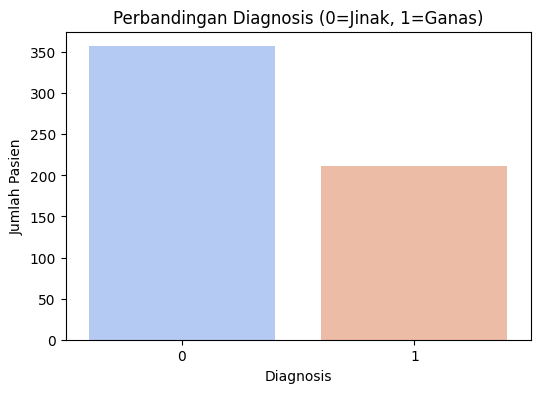

10 Fitur yang paling berpengaruh terhadap Kanker Ganas:
diagnosis               1.000000
concave points_worst    0.793566
perimeter_worst         0.782914
concave points_mean     0.776614
radius_worst            0.776454
perimeter_mean          0.742636
area_worst              0.733825
radius_mean             0.730029
area_mean               0.708984
concavity_mean          0.696360
concavity_worst         0.659610
Name: diagnosis, dtype: float64


In [424]:

plt.figure(figsize=(6, 4))
sns.countplot(x='diagnosis', data=df_ori, palette='coolwarm')
plt.title('Perbandingan Diagnosis (0=Jinak, 1=Ganas)')
plt.xlabel('Diagnosis')
plt.ylabel('Jumlah Pasien')
plt.show()
# Melihat korelasi semua fitur terhadap diagnosis
# Semakin mendekati 1, semakin kuat pengaruhnya terhadap kanker ganas
korelasi = df_ori.corr()['diagnosis'].sort_values(ascending=False)

print("10 Fitur yang paling berpengaruh terhadap Kanker Ganas:")
print(korelasi.head(11)) # Top 10 + diagnosis itu sendiri

Hasil pengecekan kardinalitas mengidentifikasi bahwa variabel target memiliki dua nilai unik, sehingga dikategorikan sebagai klasifikasi biner. Oleh karena itu, dilakukan konversi data kategori menjadi numerik . Transformasi ini dilakukan untuk memenuhi spesifikasi *input* pada pustaka Scikit-Learn, serta memastikan kalkulasi matematis dapat berjalan, baik pada algoritma KNN yang menggunakan metrik jarak (Euclidean distance), maupun pada algoritma Decision Tree dalam menentukan pemecahan node (splitting criteria) terbaik

## C- Splitting Data

Pada tahap ini, dataset dibagi menjadi dua subset terpisah, yaitu data latih *training set* dan data uji *testing set*. Proses *splitting* dilakukan dengan rasio 80:20, di mana 80% data digunakan untuk melatih algoritma agar dapat mempelajari pola fitur kanker, sedangkan 20% sisanya digunakan sebagai data uji untuk mengevaluasi performa model.

Langkah ini krusial dilakukan untuk mengukur kemampuan generalisasi model terhadap data baru yang belum pernah dilihat sebelumnya. Selain itu, pemisahan ini berfungsi untuk mendeteksi dan mencegah terjadinya *overfitting*, yaitu kondisi di mana model hanya menghafal data latih namun gagal melakukan prediksi akurat pada data baru. Parameter random_state diterapkan untuk menjaga konsistensi pengacakan data, dan shuffle=True digunakan untuk memastikan distribusi kelas label (Benign/Malignant) tersebar merata di kedua subset data

In [425]:
#mendeskripsikan variabel X dan y
X = df_ori.drop('diagnosis', axis=1)  # Ambil semua kolom KECUALI diagnosis
y = df_ori['diagnosis']               # Ambil HANYA kolom diagnosis

In [426]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [427]:
X_train,X_test,y_train,y_test =train_test_split(X,y,test_size=0.2,random_state=42, shuffle= True)
X_train.shape

(455, 30)

In [428]:
X_train,X_test,y_train,y_test =train_test_split(X,y,test_size=0.2,random_state=42, stratify=y)
X_test.shape

(114, 30)

## D- Handling Outlier

Penanganan outlier perlu dilakukan karena KNN menghitung jarak menggunakan Euclidean. Jika terdapat data dengan nilai yang sangat jauh *outlier*, perhitungan jarak menjadi tidak akurat dan dapat menarik hasil prediksi ke arah yang keliru. Handling *outlier* pada penelitian ini tidak dilakukan dengan penghapusan data, melainkan melalui teknik Feature Scaling (Standardisasi). Hal ini disebabkan karena nilai ekstrem *outlier* pada fitur seperti area_mean merepresentasikan variasi biologis alami dari sel kanker ganas (Malignant) yang merupakan informasi vital bagi model.

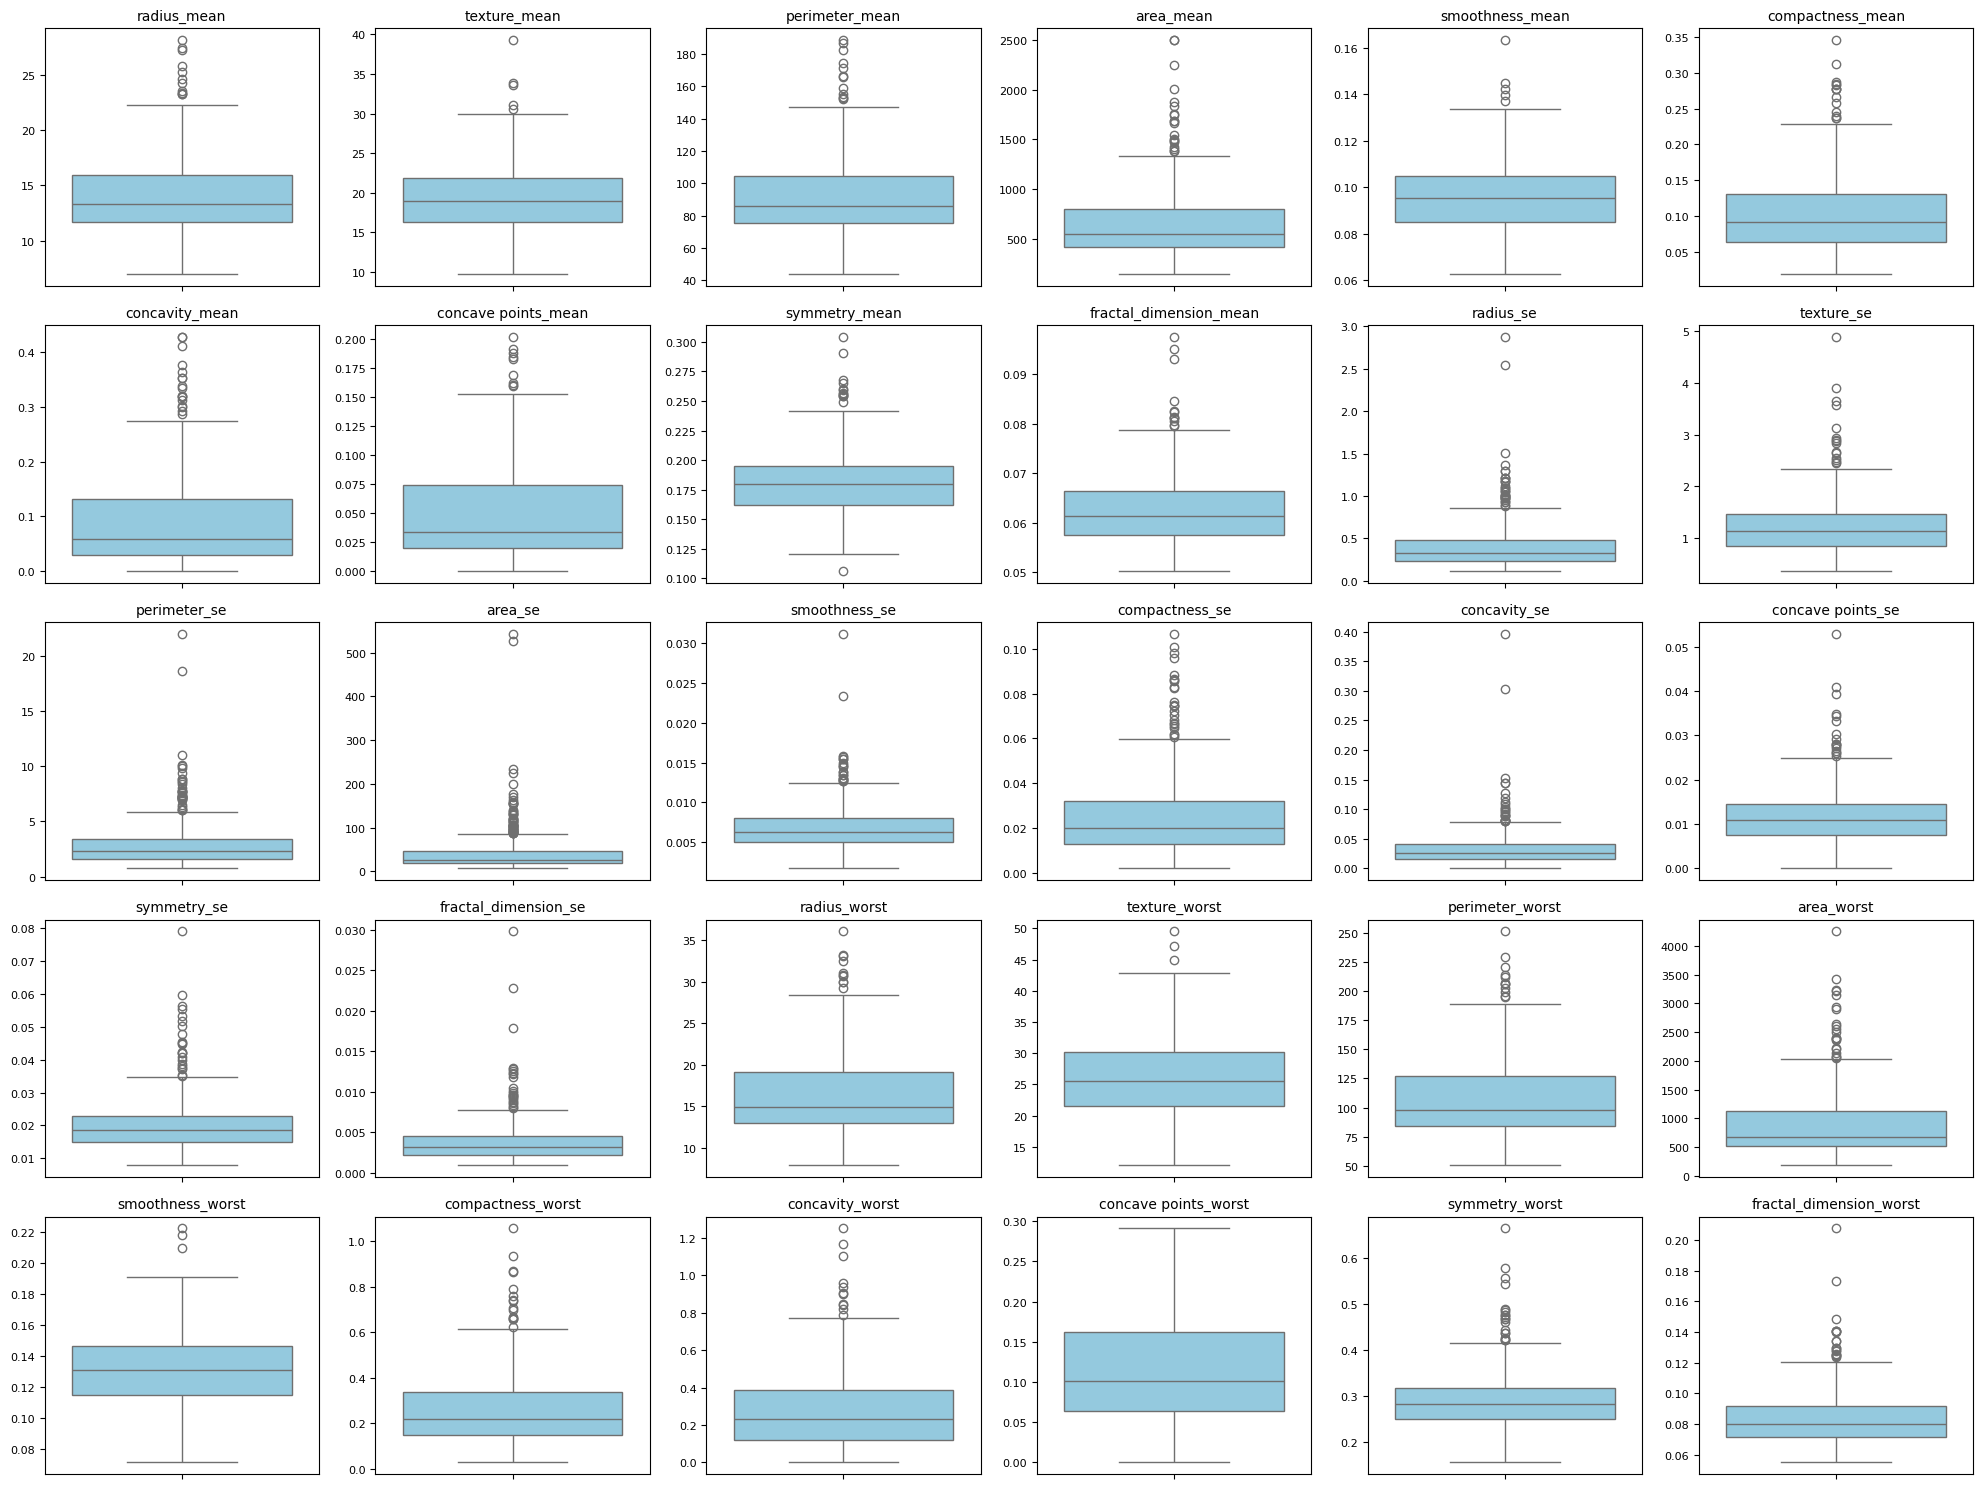

In [429]:

# Mengambil semua nama kolom fitur (X)
features = X.columns.tolist()
n_features = len(features)

# Mengatur ukuran grid (misal: 6 kolom x 5 baris = 30 kotak)
n_cols = 6
n_rows = math.ceil(n_features / n_cols)

# Membuat kanvas gambar yang besar
plt.figure(figsize=(20, 15)) # Ukuran gambar (lebar, tinggi)

for i, feature in enumerate(features):
    plt.subplot(n_rows, n_cols, i + 1)
    # Menggunakan X_train untuk melihat data yang akan dilatih
    sns.boxplot(y=X_train[feature], color='skyblue')
    plt.title(feature, fontsize=10)
    plt.ylabel('') # Hilangkan label Y agar tidak penuh
    plt.tick_params(axis='both', which='major', labelsize=8)

plt.tight_layout() # Agar jarak antar grafik rapi otomatis
plt.show()

Berdasarkan hasil visualisasi *boxplot* pada seluruh fitur *dataset*, terlihat jelas bahwa mayoritas variabel memiliki indikasi *outlier* yang cukup signifikan, ditandai dengan banyaknya titik-titik hitam yang berada di luar rentang garis whisker. Keberadaan *outlier* ini diinterpretasikan sebagai variasi biologis alami dari karakteristik sel kanker ganas (Malignant) yang cenderung memiliki dimensi ukuran atau tekstur yang ekstrem dibandingkan sel normal, sehingga diputuskan untuk tetap mempertahankan data tersebut guna menjaga integritas informasi medis. Selain itu, visualisasi ini juga memperlihatkan ketimpangan skala *range* yang sangat mencolok antar fitur, di mana variabel seperti area_mean memiliki rentang nilai hingga ribuan, sementara variabel lain seperti smoothness_mean hanya berkisar pada satuan desimal kecil, yang mana kondisi ini mengonfirmasi urgensi penerapan Feature Scaling sebelum proses pemodelan, khususnya untuk algoritma sensitif jarak seperti KNN.

## E- Scaling

Penerapan *feature scaling*  pada penelitian ini didasari oleh adanya perbedaan rentang nilai *range* yang signifikan antar fitur pada *dataset* Breast Cancer Wisconsin. Sebagai contoh, fitur area_mean memiliki rentang nilai hingga ribuan, sementara smoothness_mean berada pada rentang desimal (0.0 - 0.1).

Tanpa proses *scaling*, algoritma K-Nearest Neighbors (KNN) yang berbasis perhitungan jarak *distance-based* akan mengalami bias, di mana fitur dengan nilai nominal besar akan mendominasi perhitungan jarak Euclidean, sehingga fitur bernilai kecil dianggap tidak signifikan. Oleh karena itu, StandardScaler digunakan untuk menstandarisasi seluruh fitur ke skala yang setara (mean=0, std=1) guna memastikan setiap fitur memiliki kontribusi yang berimbang dalam proses klasifikasi

In [430]:

# 1. Panggil alat Standardisasi
scaler = StandardScaler()

# 2. Lakukan Scaling pada Data Latih (Fit & Transform)
X_train_scaled = scaler.fit_transform(X_train)

# 3. Lakukan Scaling pada Data Uji (Transform saja)
# Gunakan pola yang sama dari data latih untuk mengubah data uji
X_test_scaled = scaler.transform(X_test)

# 4. (Opsional) Kembalikan ke bentuk DataFrame agar enak dilihat mata
# Langkah ini opsional, tapi bagus untuk memastikan hasilnya benar
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X.columns)

# Cek hasil 5 baris pertama (Angkanya sekarang di kisaran -3 sampai 3)
print("Data setelah discaling (Outlier sudah aman untuk KNN):")
print(X_train_scaled.head())

Data setelah discaling (Outlier sudah aman untuk KNN):
   radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0     0.518559      0.891826        0.424632   0.383925        -0.974744   
1    -0.516364     -1.639710       -0.541349  -0.542961         0.476219   
2    -0.368118      0.455515       -0.388250  -0.402970        -1.432979   
3     0.205285      0.726168        0.400330   0.070612         0.243253   
4     1.243005      0.194195        1.210377   1.206652        -0.111442   

   compactness_mean  concavity_mean  concave points_mean  symmetry_mean  \
0         -0.689772       -0.688586            -0.398175      -1.039155   
1         -0.631834       -0.604281            -0.303075       0.521543   
2         -0.383927       -0.342175            -0.765459      -0.850857   
3          2.203585        2.256094             1.213233       0.818474   
4          0.051348        0.732962             0.713767      -0.427187   

   fractal_dimension_mean  ...  radiu

## F- Encoding

Oleh karena data yang digunakan berupa angka, langkah Feature Processingnya bukan *encoding*, melainkan scaling atau standarisasi. Jika pada contoh lain dilakukan encoding, di sini yang digunakan adalah scaling. Tujuannya sama, yaitu menyiapkan data X agar dapat dibaca dan diproses dengan optimal oleh algoritma

## G- Balancing Data

In [431]:
# 1. Cek Jumlah Baris (Absolut)
print("=== Jumlah Data per Kelas (0=Jinak, 1=Ganas) ===")
print(df_ori['diagnosis'].value_counts())

# 2. Cek Persentase/Rasio (Proporsi)
print("\n=== Persentase Rasio ===")
print(df_ori['diagnosis'].value_counts(normalize=True) * 100)

# 3. (Opsional tapi Penting) Cek Rasio di Data Latih (y_train)
# Karena model belajar dari sini, kita harus pastikan data latihnya juga punya rasio yang mirip
print("\n=== Rasio pada Data Latih (y_train) ===")
print(y_train.value_counts(normalize=True) * 100)

=== Jumlah Data per Kelas (0=Jinak, 1=Ganas) ===
diagnosis
0    357
1    212
Name: count, dtype: int64

=== Persentase Rasio ===
diagnosis
0    62.741652
1    37.258348
Name: proportion, dtype: float64

=== Rasio pada Data Latih (y_train) ===
diagnosis
0    62.637363
1    37.362637
Name: proportion, dtype: float64


Pada data ini tidak perlu melakukan balancing data *resampling*. Karena tingkat ketimpangan kelas yang ada masih tergolong aman. Rasio antara kelas mayoritas dan minoritas berada di kisaran 1.7 : 1, yang dalam praktik Data Science termasuk *mild imbalance* atau ketimpangan ringan. Pada kondisi seperti ini, algoritma seperti Decision Tree dan KNN tetap mampu mempelajari pola dengan baik tanpa memerlukan teknik balancing tambahan, termasuk metode seperti SMOTE.

# _Training Model_

# Decision Tree

In [432]:
# Training using Decision Tree
%%time


model_dt = DecisionTreeClassifier(max_depth=6, random_state=10)
model_dt.fit(X_train_scaled, y_train)
y_pred_dt = model_dt.predict(X_test_scaled)


CPU times: user 14.4 ms, sys: 1.01 ms, total: 15.4 ms
Wall time: 22 ms


# KNN

In [433]:
# Training using KNN
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train_scaled, y_train)
y_pred_knn = knn.predict(X_test_scaled)

In [434]:
# Cross Validation using `cross_val_score`

%%time
accuracy_cross_val = cross_val_score(knn,
                                     X_train_scaled,
                                     y_train,
                                     cv=5,
                                     scoring="accuracy")

print('accuracy - All - Cross Validation  : ', accuracy_cross_val)
print('accuracy - Mean - Cross Validation : ', accuracy_cross_val.mean())
print('accuracy - Std - Cross Validation  : ', accuracy_cross_val.std())
print('accuracy - Range of Test-Set       : ', (accuracy_cross_val.mean()-accuracy_cross_val.std()) , '-', (accuracy_cross_val.mean()+accuracy_cross_val.std()))

accuracy - All - Cross Validation  :  [0.95604396 0.98901099 0.93406593 0.96703297 0.95604396]
accuracy - Mean - Cross Validation :  0.9604395604395606
accuracy - Std - Cross Validation  :  0.01785502946073838
accuracy - Range of Test-Set       :  0.9425845309788222 - 0.9782945899002989
CPU times: user 39.6 ms, sys: 199 µs, total: 39.8 ms
Wall time: 81.9 ms


In [435]:

param_dist = {
    'n_neighbors': randint(3, 500), # Ambil K acak antara 3 dan 500
    'weights': ['uniform', 'distance'],
    'metric': ['minkowski','manhattan', 'mahalanobis','euclidean','hamming'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'leaf_size': randint(10, 60)
}

random_search = RandomizedSearchCV(estimator=KNeighborsClassifier(),
                                   param_distributions=param_dist,
                                   n_iter=100,
                                   cv=5,
                                   scoring='accuracy',
                                   n_jobs=-1,
                                   random_state=42)
random_search.fit(X_train_scaled, y_train)
print("Parameter Terbaik :", random_search.best_params_)


Parameter Terbaik : {'algorithm': 'auto', 'leaf_size': 15, 'metric': 'euclidean', 'n_neighbors': 30, 'weights': 'distance'}


/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
65 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
35 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.12/dist-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/sklearn/neighbors/_classification.py", line 239, in fit
    return self._fit(X,

In [436]:
#menampilkan nilai cv
results = random_search.cv_results_
best_index = random_search.best_index_
n_splits = random_search.n_splits_
accuracy_cross_val = np.array([
    results[f'split{i}_test_score'][best_index] for i in range(n_splits)
])
print(f"Parameter Terbaik: {random_search.best_params_}")
print("-" * 30)
print('accuracy - All - Cross Validation  : ', accuracy_cross_val)
print('accuracy - Mean - Cross Validation : ', accuracy_cross_val.mean())
print('accuracy - Std - Cross Validation  : ', accuracy_cross_val.std())
print('accuracy - Range of Test-Set       : ', (accuracy_cross_val.mean() - accuracy_cross_val.std()), '-', (accuracy_cross_val.mean() + accuracy_cross_val.std()))

Parameter Terbaik: {'algorithm': 'auto', 'leaf_size': 15, 'metric': 'euclidean', 'n_neighbors': 30, 'weights': 'distance'}
------------------------------
accuracy - All - Cross Validation  :  [0.95604396 0.98901099 0.93406593 0.94505495 0.94505495]
accuracy - Mean - Cross Validation :  0.953846153846154
accuracy - Std - Cross Validation  :  0.01890620937811568
accuracy - Range of Test-Set       :  0.9349399444680383 - 0.9727523632242697


In [437]:

model_knn_final = KNeighborsClassifier(
    n_neighbors=30,
    weights='distance',
    metric='euclidean',
    algorithm='auto',
    leaf_size=15,
    n_jobs=-1
)
model_knn_final.fit(X_train_scaled, y_train)

KNeighborsClassifier(leaf_size=15, metric='euclidean', n_jobs=-1,
                     n_neighbors=30, weights='distance')

# _Model Performance_

# Desicion Tree

Decision Tree - Train


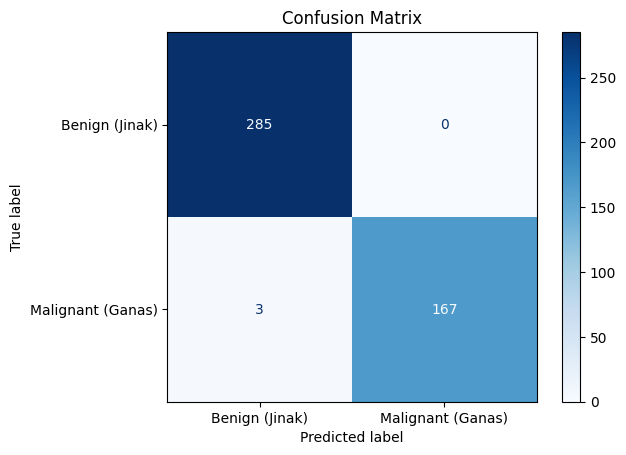

                   precision    recall  f1-score   support

   Benign (Jinak)       0.99      1.00      0.99       285
Malignant (Ganas)       1.00      0.98      0.99       170

         accuracy                           0.99       455
        macro avg       0.99      0.99      0.99       455
     weighted avg       0.99      0.99      0.99       455

Decision Tree - Test


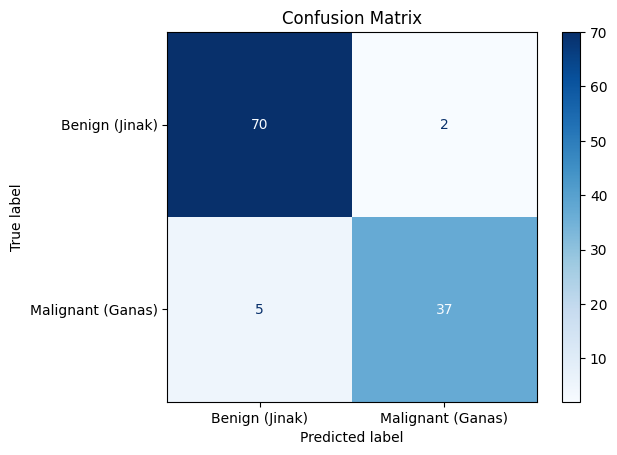

                   precision    recall  f1-score   support

   Benign (Jinak)       0.93      0.97      0.95        72
Malignant (Ganas)       0.95      0.88      0.91        42

         accuracy                           0.94       114
        macro avg       0.94      0.93      0.93       114
     weighted avg       0.94      0.94      0.94       114



In [438]:
# Model Evaluation
# Definisi nama kelas
classes = ['Benign (Jinak)', 'Malignant (Ganas)']
def performance_check(clf, X, y, classes):
  y_pred = clf.predict(X)
  cm = confusion_matrix(y, y_pred)
  disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
  disp.plot(cmap='Blues')
  plt.title('Confusion Matrix')
  plt.show()
  print(classification_report(y, y_pred, target_names=classes))


print('Decision Tree - Train')
performance_check(model_dt, X_train_scaled, y_train, classes)


print('Decision Tree - Test')
performance_check(model_dt, X_test_scaled, y_test, classes)

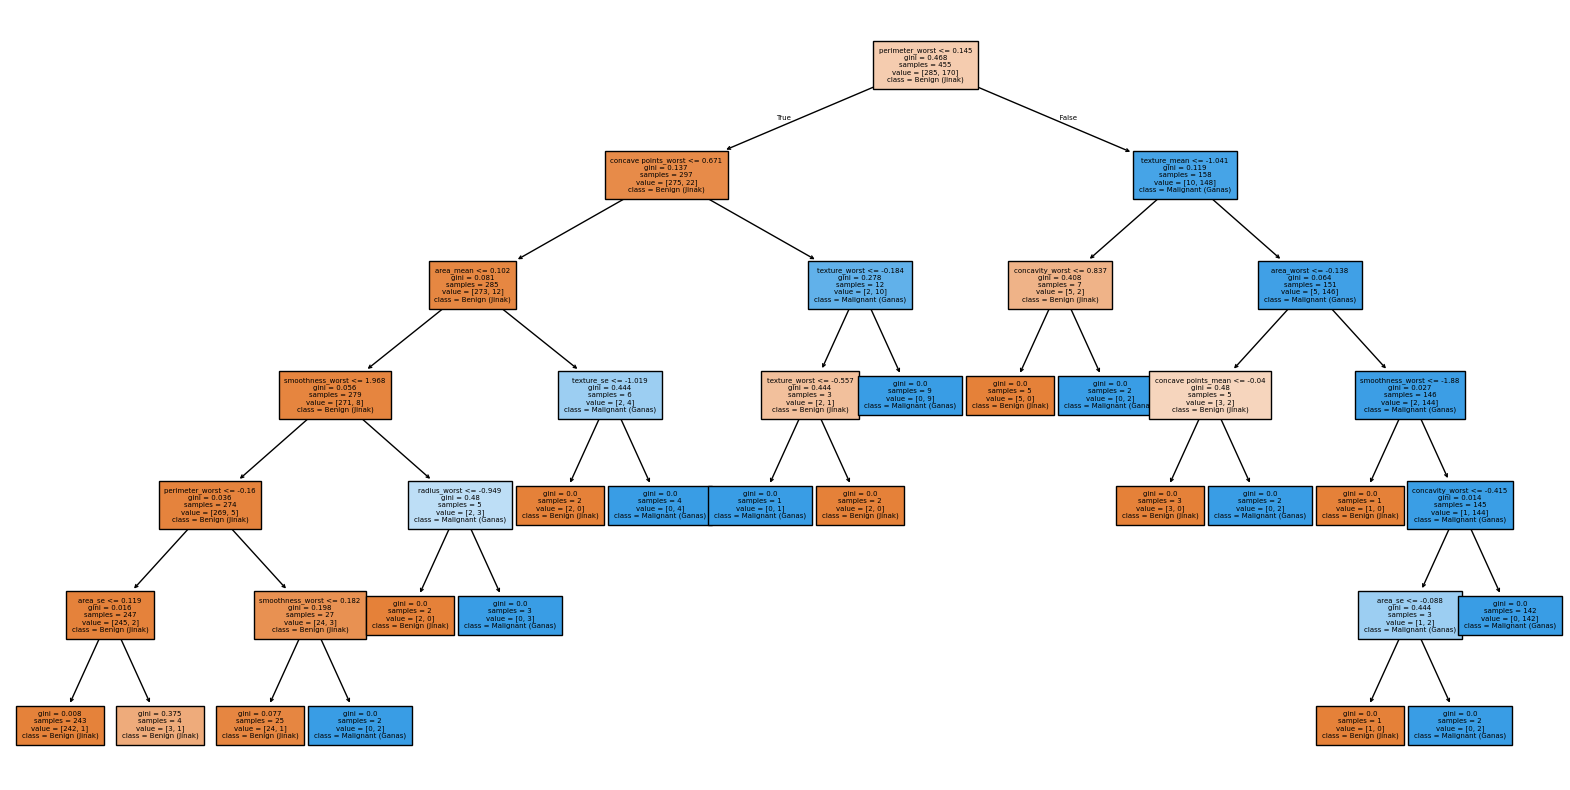

In [439]:
# Using Only Scikit-Learn
plt.figure(figsize=(20,10))
tree.plot_tree(model_dt,
               feature_names=X.columns.tolist(),
               class_names=['Benign (Jinak)', 'Malignant (Ganas)'],
               filled=True,
               fontsize= 5)
plt.show()

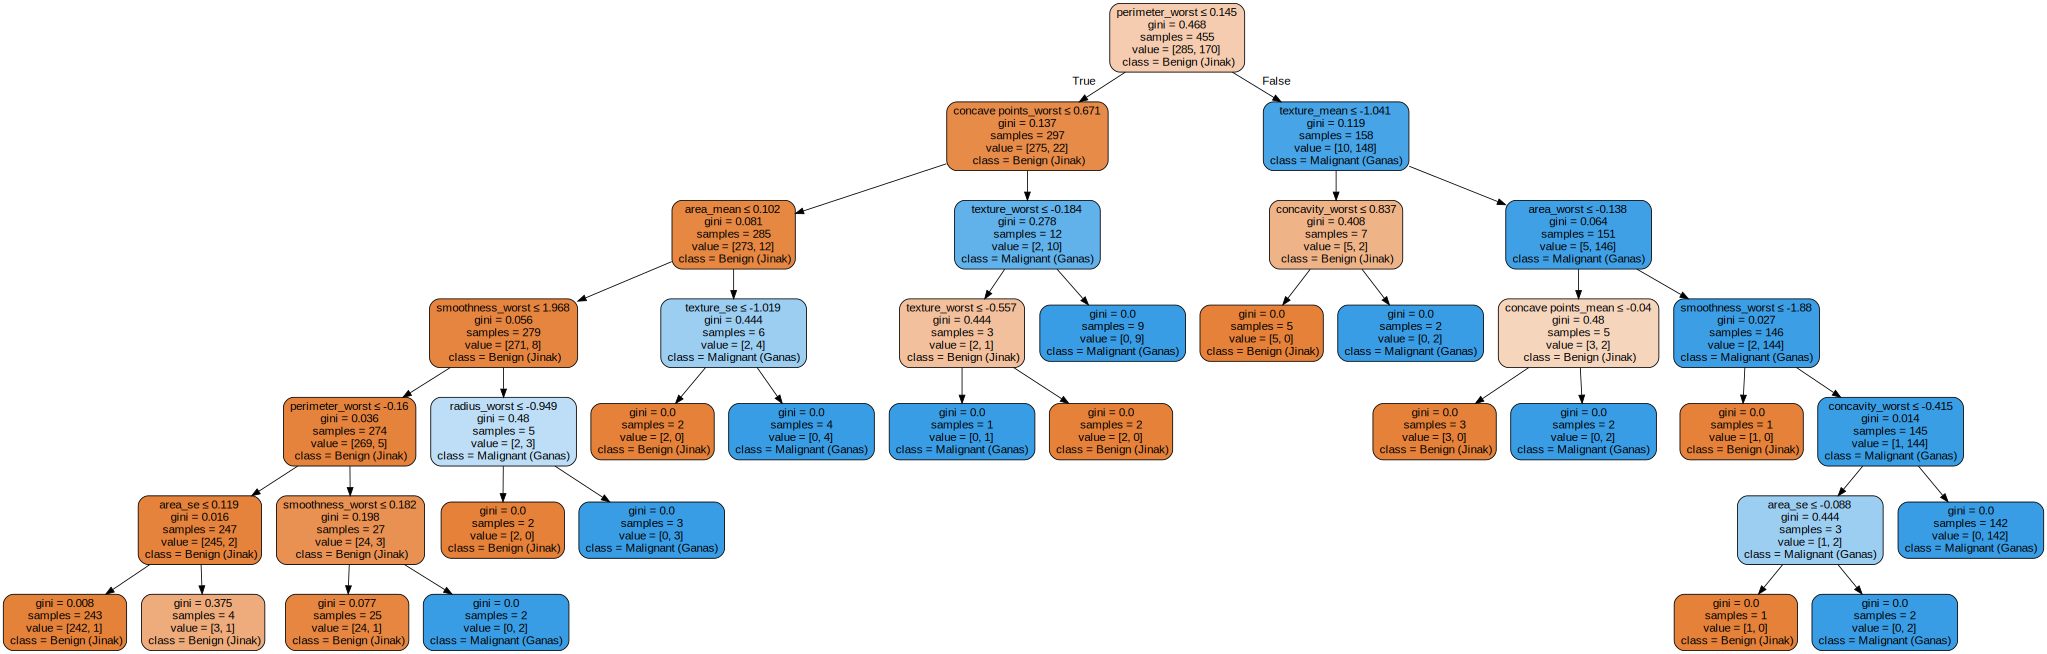

In [440]:
# Using Scikit-Learn and Graphviz
dot_data = tree.export_graphviz(model_dt, out_file=None,
                                feature_names=X.columns.tolist(),
                                class_names=['Benign (Jinak)', 'Malignant (Ganas)'], filled=True, rounded=True, special_characters=True)
graph = graphviz.Source(dot_data)
graph

# KNN

KNN - Train


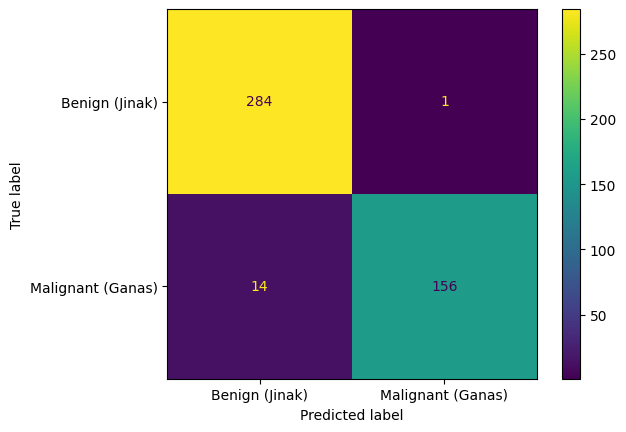

                   precision    recall  f1-score   support

   Benign (Jinak)       0.95      1.00      0.97       285
Malignant (Ganas)       0.99      0.92      0.95       170

         accuracy                           0.97       455
        macro avg       0.97      0.96      0.96       455
     weighted avg       0.97      0.97      0.97       455


KNN - Test


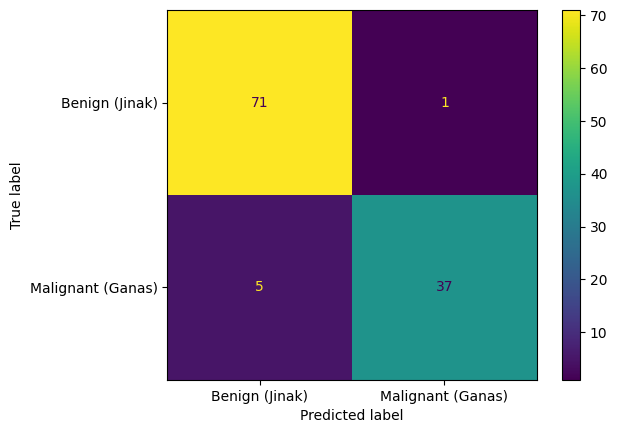

                   precision    recall  f1-score   support

   Benign (Jinak)       0.93      0.99      0.96        72
Malignant (Ganas)       0.97      0.88      0.93        42

         accuracy                           0.95       114
        macro avg       0.95      0.93      0.94       114
     weighted avg       0.95      0.95      0.95       114



In [441]:
# Model Evaluation

def performance_check(clf, X, y, classes):
  y_pred = clf.predict(X)
  cm = confusion_matrix(y, y_pred)
  disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
  disp.plot()
  plt.show()
  print(classification_report(y, y_pred, target_names=classes))

print('KNN - Train')
performance_check(knn, X_train_scaled, y_train, classes)
print('')

print('KNN - Test')
performance_check(knn, X_test_scaled, y_test, classes)

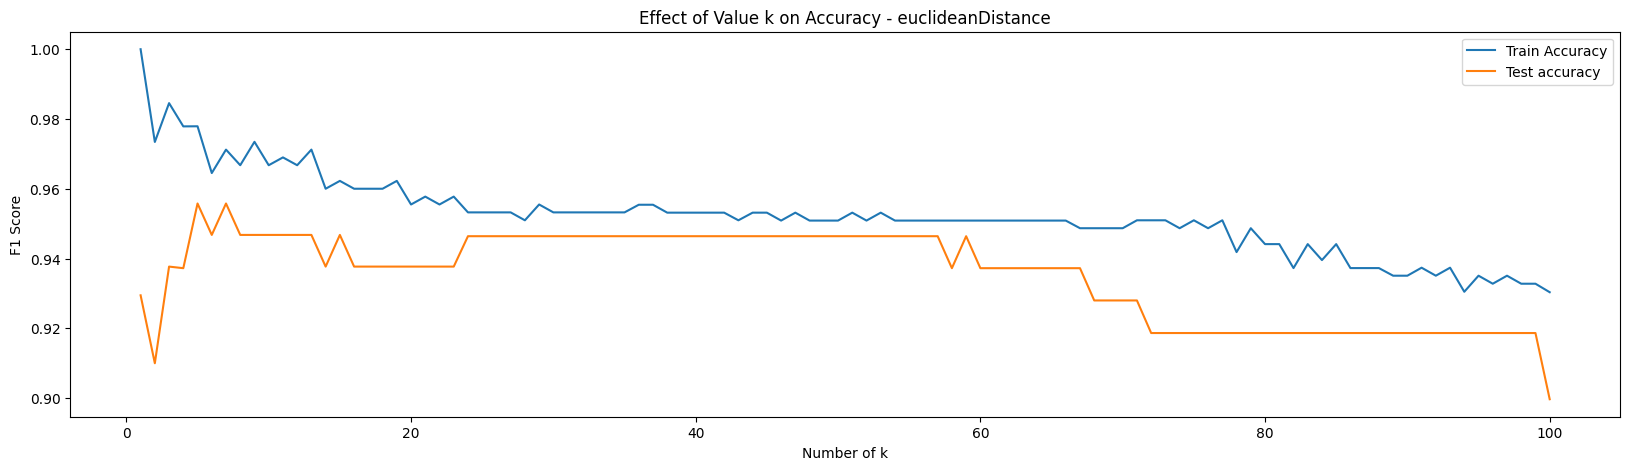

In [442]:

# Get F1 Score from k = 1 to k = 15
max_k =100
train_acc = []
test_acc = []

for loop in range (1, max_k+1):
  knn = KNeighborsClassifier(n_neighbors = loop,metric='euclidean')
  knn.fit(X_train_scaled, y_train)

  y_pred_train_knn = knn.predict(X_train_scaled)
  y_pred_test_knn = knn.predict(X_test_scaled)

  train_acc.append(f1_score(y_train, y_pred_train_knn, average='weighted'))
  test_acc.append(f1_score(y_test, y_pred_test_knn, average='weighted'))

# Visualization of Accuracy
plt.figure(figsize=(20,5))
plt.title('Effect of Value k on Accuracy - euclideanDistance')
plt.plot(range(1, max_k+1), train_acc, label='Train Accuracy')
plt.plot(range(1, max_k+1), test_acc, label='Test accuracy')

plt.legend()
plt.xlabel('Number of k')
plt.ylabel('F1 Score')
plt.show()

Berdasarkan grafik visualisasi pengaruh nilai $k$ terhadap performa model menggunakan metrik jarak Euclidean, terlihat pola generalisasi yang konsisten. Garis biru (Train Accuracy) menunjukkan tren penurunan alami dari angka sempurna seiring bertambahnya jumlah tetangga, yang mengindikasikan berkurangnya kecenderungan overfitting (menghafal data). Sementara itu, garis oranye (Test Accuracy) menunjukkan peningkatan signifikan pada nilai $k$ awal dan mencapai fase stabil (plateau) dengan performa optimal pada rentang $k=20$ hingga $k=40$. Hal ini secara visual memvalidasi hasil hyperparameter tuning sebelumnya yang memilih $k=30$ sebagai parameter terbaik, karena pada titik tersebut model menghasilkan skor F1 tertinggi dan stabil pada data uji sebelum akhirnya mengalami penurunan performa (underfitting) yang cukup tajam ketika nilai $k$ melampaui angka 60.

=== TABEL PERBANDINGAN PERFORMA MODEL ===
           Model  Akurasi  Precision  Recall  F1-Score
0  Decision Tree    93.86      94.87   88.10     91.36
1    KNN (Tuned)    94.74     100.00   85.71     92.31


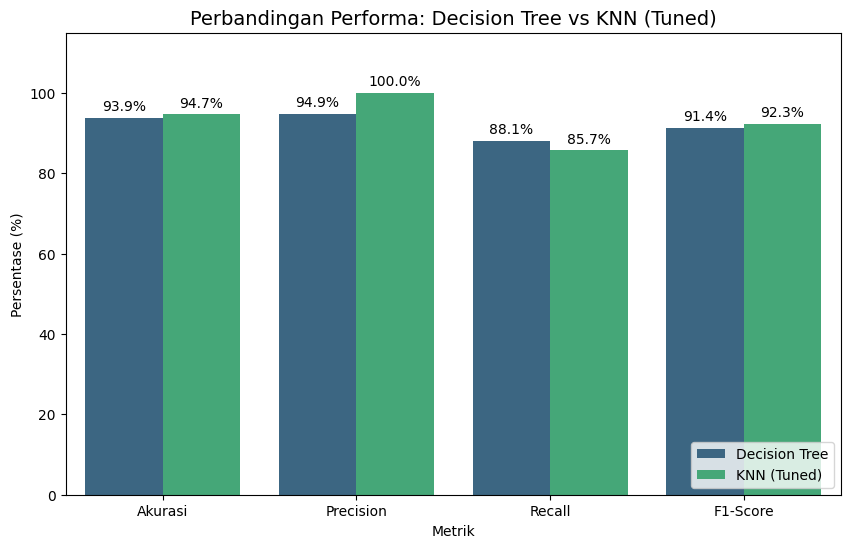

In [443]:

# ==========================================
# 1. PERSIAPAN DATA & PREDIKSI
# ==========================================
# Kita bandingkan model DT (Awal) dengan KNN (Final/Tuned)
models = {
    'Decision Tree': model_dt,
    'KNN (Tuned)': model_knn_final
}

results = []

for name, model in models.items():
    # Prediksi ke Data Uji
    y_pred = model.predict(X_test_scaled)

    # Hitung Metrik
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Simpan ke list
    results.append({
        'Model': name,
        'Akurasi': acc * 100,
        'Precision': prec * 100,
        'Recall': rec * 100,
        'F1-Score': f1 * 100
    })

# Buat DataFrame agar jadi Tabel Cantik
df_results = pd.DataFrame(results)

# ==========================================
# 2. TAMPILKAN TABEL PERBANDINGAN
# ==========================================
print("=== TABEL PERBANDINGAN PERFORMA MODEL ===")
print(df_results.round(2)) # Bulatkan 2 desimal


# ==========================================
# 3. VISUALISASI GRAFIK BATANG (BAR CHART)
# ==========================================
# Melt dataframe agar bisa di-plot dengan seaborn
df_melted = df_results.melt(id_vars='Model', var_name='Metrik', value_name='Skor')

plt.figure(figsize=(10, 6))
ax = sns.barplot(data=df_melted, x='Metrik', y='Skor', hue='Model', palette='viridis')

# Tambahkan angka di atas batang
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%', padding=3)

plt.title('Perbandingan Performa: Decision Tree vs KNN (Tuned)', fontsize=14)
plt.ylim(0, 115) # Beri ruang di atas biar angka tidak kepotong
plt.legend(loc='lower right')
plt.ylabel('Persentase (%)')
plt.show()

Berdasarkan hasil komparasi performa model pada tabel dan visualisasi grafik di atas, terlihat bahwa algoritma KNN (Tuned) secara umum mengungguli Decision Tree dengan pencapaian akurasi sebesar 94.74% berbanding 93.86%. Keunggulan paling signifikan dari model KNN terletak pada metrik Presisi yang mencapai angka sempurna 100%, yang mengindikasikan bahwa model ini memiliki keandalan mutlak dalam memprediksi kelas positif (kanker ganas) tanpa menghasilkan kesalahan False Positive (memvonis orang sehat sebagai sakit). Meskipun demikian, algoritma Decision Tree menunjukkan sensitivitas yang sedikit lebih baik dengan nilai Recall sebesar 88.10% dibandingkan KNN yang berada di angka 85.71%, menandakan bahwa Decision Tree mampu menjaring sedikit lebih banyak kasus positif dari total data aktual. Namun, jika ditinjau dari keseimbangan performa secara keseluruhan melalui F1-Score, KNN tetap lebih unggul dengan nilai 92.31%, menjadikannya model yang lebih robust dan presisi untuk studi kasus ini.

# Kesimpulan

Penelitian ini telah berhasil mengimplementasikan dan membandingkan kinerja dua algoritma supervised learning utama, yaitu Decision Tree dan K-Nearest Neighbors (KNN), dalam konteks klasifikasi diagnosis kanker payudara menggunakan pustaka Scikit-learn. Melalui pendekatan sistematis yang mencakup pemahaman konsep dasar, visualisasi pohon keputusan, hingga evaluasi teknis menggunakan confusion matrix, disimpulkan bahwa pemilihan algoritma dan parameter yang tepat sangat menentukan akurasi prediksi. Proses hyperparameter tuning pada algoritma KNN secara khusus menunjukkan bahwa penggunaan metrik jarak Euclidean dengan nilai $k=30$ memberikan keseimbangan optimal antara bias dan varians, di mana grafik performa memperlihatkan stabilitas akurasi uji (Test Accuracy) pada rentang $k=20$ hingga $k=40$, sekaligus efektif mencegah terjadinya overfitting.

Secara komparatif, hasil evaluasi akhir menetapkan KNN (Tuned) sebagai model terbaik untuk studi kasus ini, mengungguli Decision Tree pada mayoritas metrik vital. KNN mencatatkan Akurasi sebesar 94.74% dan F1-Score 92.31%, yang mencerminkan kekokohan model dalam menangani data. Keunggulan paling krusial terletak pada nilai Presisi yang mencapai 100%, menandakan bahwa model ini memiliki keandalan mutlak dalam memprediksi kasus ganas tanpa menghasilkan positif palsu (False Positive). Meskipun Decision Tree memiliki sensitivitas (Recall) yang sedikit lebih tinggi (88.10%), presisi sempurna dan performa keseluruhan yang lebih stabil menjadikan KNN pilihan yang lebih aman dan presisi untuk diagnosis medis pada dataset ini. Rangkaian analisis ini menegaskan pentingnya pemahaman mendalam terhadap karakteristik data dan metrik evaluasi dalam membangun solusi machine learning yang efektif.

# Referensi

Mustofa, A., & Hidayat, F. F. (2022). Analisis Pengaruh Feature Scaling pada Klasifikasi Kanker Payudara menggunakan K-Nearest Neighbor dan Support Vector Machine. Jurnal Ilmiah Teknologi Informasi Terapan (Jurnal TITIAN), 8(2), 163-172.

Mulyono, B., Astuti, W., & Santoso, H. B. (2019). Penerapan Teknik Data Mining untuk Klasifikasi Tingkat Akurasi Diagnosa Penyakit. Jurnal Sistem Informasi Bisnis (JSINBIS), 9(2), 115-125.

Prasetyo, H., & Dewi, E. N. (2021). Komparasi Algoritma K-Nearest Neighbor dan Naive Bayes untuk Klasifikasi Status Gizi Balita. Jurnal Kesehatan Masyarakat (JKM), 10(1), 45–52.

Sari, P. K., & Rahman, A. (2020). Prediksi Kanker Serviks Menggunakan Machine Learning: Kajian Literatur. Prosiding Seminar Nasional Kesehatan (SNK), 56–64.

Wibowo, A. J., & Santoso, T. B. (2018). Implementasi Algoritma C4.5 untuk Analisis Faktor Penentu Keputusan Kredit: Studi Kasus Perbankan Syariah. Jurnal Informatika: Jurnal Pengembangan IT (JPIT), 3(2), 140–147.